In [1]:
import pandas as pd
import numpy as np
import re

In [2]:
url = 'https://github.com/laxmimerit/All-CSV-ML-Data-Files-Download/raw/master/twitter4000.csv'
df = pd.read_csv(url)

In [3]:
df["sentiment"].value_counts()

sentiment
0    2000
1    2000
Name: count, dtype: int64

In [4]:
df.isnull().sum()

tweets       0
sentiment    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweets     4000 non-null   object
 1   sentiment  4000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 62.6+ KB


### Character count

In [6]:
text = 'i am the   king'
len(text.replace(' ',''))

10

In [7]:
# using regex
pattern = r'\s'
len(re.sub(pattern, '', text))

10

In [8]:
# apply it
df['char_count'] = df['tweets'].apply(lambda x: len(re.sub(pattern, '', x)))
df.sample(6)

,tweets,sentiment,char_count
2377,@kemmeyer hahaha. I totally agree. I couldn't ...,1,65
1549,@Eyyee aww im sorry. thanks btw. ill addd you...,0,79
842,@litebriteac lmaoo smh twitter goin nuttz lmao...,0,58
1577,"Kind of a deal-breaker, when u discover a hot...",0,113
750,has no followers..not a single one,0,29
3789,@kapsarovb Wow... you're full of useful links ...,1,45


## word count

In [9]:
x = 'this is sample text   data'
len(x.split())

5

In [10]:
df["word_count"] = df['tweets'].apply(lambda x: len(x.split()))
df.sample(6)

,tweets,sentiment,char_count,word_count
1415,"http://twitpic.com/7k6qh - I fell asleep, wait...",0,61,9
2261,dad's comin home from the philippines today.,1,38,7
2450,"is watching tv, reba to be exact",1,26,7
851,This economy thing is getting us down. I stay ...,0,103,23
204,@sross4 why?,0,11,2
1547,Didn't have a good day feeling kinda sad.,0,34,8


### avg word length

In [11]:
df['word_length'] = df['char_count']/df['word_count']

In [12]:
df['word_length'] = df['word_length'].apply(lambda x: round(x ,1))

In [13]:
df.sample(5)

,tweets,sentiment,char_count,word_count,word_length
2211,just painted my nails a beautiful orange and p...,1,65,15,4.3
3449,"JessSanta) I'm just saying, he's a jolly old m...",1,46,11,4.2
1857,I broke my iPhone it was perfect and I droppe...,0,57,15,3.8
1124,disappointed,0,12,1,12.0
3720,@joeymcintyre you should just come in and lurk...,1,88,19,4.6


In [14]:
df.rename(columns={'word_length': 'avg_word_length'}, inplace=True)

In [15]:
df.sample(6)

,tweets,sentiment,char_count,word_count,avg_word_length
40,"Ah, suddenly I can feel the bitter of those me...",0,45,10,4.5
575,@D_Boon_147 That it is. Can you explain it to ...,0,81,17,4.8
3544,@CrimsonRaven Not &quot;work&quot; exactly - j...,1,93,18,5.2
1835,@EllieVonTainted I KNOW I LOVE TRUE BLOODS,0,36,7,5.1
195,trying to figure out tweetdeck and failing mis...,0,45,8,5.6
1327,i want holiday so badly,0,19,5,3.8


## stop word count 

In [16]:
from spacy.lang.en.stop_words import STOP_WORDS as stopwords

In [17]:
len(stopwords)

326

In [18]:
x = "This is an example text data. let's use this"
[word for word in x.lower().split() if word in stopwords]

['this', 'is', 'an', 'this']

In [19]:
x = "This is an example text data. let's use this"
len([word for word in x.lower().split() if word in stopwords])

4

In [20]:
df['stop_word_len'] = df['tweets'].apply(lambda x:len([word for word in x.lower().split() if word in stopwords]))

In [21]:
df.sample(7)

,tweets,sentiment,char_count,word_count,avg_word_length,stop_word_len
3674,@JohnLusher You're most welcome and g'morning ...,1,74,15,4.9,7
1535,anatomy exam in an hour and a half ahhhh,0,32,9,3.6,4
912,I'm not on Twitter enough for my replies to ev...,0,108,29,3.7,16
1932,@Dyankd Whatsup sweet heart? Gile anen nih aku,0,39,8,4.9,0
3092,@DitteOlsen HEY I WON A CONTEST,1,26,6,4.3,2
3137,I'm strangely happy. Whoever wants a hug can j...,1,45,10,4.5,4
282,really bored right now,0,19,4,4.8,2


### count #tag and @mentions

In [22]:
x = 'this is #awe #some. thank you @laxmimerit'
len(re.findall(r'#\w+', x)), len(re.findall(r'@\w+', x))

(2, 1)

In [23]:
df['hashtags_count'] = df['tweets'].apply(lambda x: len(re.findall(r'#\w+', x)))
df['mentions_count'] = df['tweets'].apply(lambda x: len(re.findall(r'@\w+', x)))

In [24]:
df['hashtags_count'].value_counts()

hashtags_count
0    3912
1      73
2      13
3       2
Name: count, dtype: int64

In [25]:
df[df['hashtags_count']>0]

,tweets,sentiment,char_count,word_count,avg_word_length,stop_word_len,hashtags_count,mentions_count
225,Already sent two or three one-forties without ...,0,117,21,5.6,6,1,0
343,"@colderICE will listening from my phone today,...",0,111,25,4.4,12,1,1
427,we want API! http://tinyurl.com/o49vf9 #wolfra...,0,109,12,9.1,2,1,0
468,Stupid bus broke down so will be late to googl...,0,57,14,4.1,6,2,0
475,@Restrictor I can only imagine what it might h...,0,113,23,4.9,11,1,1
...,...,...,...,...,...,...,...,...
3938,#DMCwmnSHOW enjoying the show very much from s...,1,44,8,5.5,5,1,0
3940,At #nfjs Denver! Please indulge me a whole mes...,1,88,16,5.5,7,1,0
3941,#assassinate is also trending because #spymast...,1,65,10,6.5,4,2,0
3944,@darrellferguson If you like Joss Whedon - che...,1,98,21,4.7,8,1,1


### numeric digits present in the tweets

In [26]:
x = 'this tweet has 3 numbers: 10 and 28989c528'
re.findall(r'\d+', x)

['3', '10', '28989', '528']

In [27]:
x = 'I want coupon code for product KGP2312AU43 and KGP1243RT. I need 10 pcs.'
re.findall(r'\b\d+\b', x)

['10']

In [28]:
df['numeric_count'] = df['tweets'].apply(lambda x: len(re.findall(r'\b\d+\b', x)))

In [29]:
df.sample(5)

,tweets,sentiment,char_count,word_count,avg_word_length,stop_word_len,hashtags_count,mentions_count,numeric_count
1854,Appalled by the Iranian situation.,0,30,5,6.0,2,0,0,0
858,@jasonislame boooo! What are you doing after ...,0,71,12,5.9,6,0,1,0
61,@kRaZy_FrEaK495 hows guitar hero? lol and matt...,0,84,17,4.9,3,0,1,0
1392,I want to see Alice in Chains in the 90's &lt;3,0,37,11,3.4,6,0,0,2
953,My chiropractor literally broke my back today ...,0,76,14,5.4,6,0,0,0


In [30]:
df['numeric_count'].value_counts()

numeric_count
0    3578
1     307
2      87
3      17
4       6
5       2
7       2
6       1
Name: count, dtype: int64

In [31]:
df[df['numeric_count']>0].sample(5)

,tweets,sentiment,char_count,word_count,avg_word_length,stop_word_len,hashtags_count,mentions_count,numeric_count
3533,It's ok megs! We will have my house to us for ...,1,72,21,3.4,13,0,0,1
3904,&quot;as a fellow power 150 blogger&quot; ehem...,1,93,19,4.9,7,0,0,1
1724,News Update: Air France Flight 447 Rio to CDG ...,0,107,21,5.1,6,0,0,2
2250,Going 2 meet gem off the train,1,24,7,3.4,2,0,0,1
3412,"@samuraiox haha well, then you got a solid 8 h...",1,60,14,4.3,4,0,1,1


### 8. UPPER case words count 

In [32]:
x = 'I AM happy today'
[word for word in x.split() if word.isupper()] , len([word for word in x.split() if word.isupper()])

(['I', 'AM'], 2)

In [33]:
df['upper_counts'] = df['tweets'].apply(lambda x: len([word for word in x.split() if word.isupper()]))

In [34]:
df[df['upper_counts']>3].iloc[0]['tweets']

"@jsong77  NOT DONE IT'S ALMOST 2 AM  this youtbe better start acting normaal"

In [35]:
df[df['upper_counts']>0].sample(5)

,tweets,sentiment,char_count,word_count,avg_word_length,stop_word_len,hashtags_count,mentions_count,numeric_count,upper_counts
600,@wepilates Thank you! Had a look this morning ...,0,81,20,4.0,11,0,1,0,1
2301,also make websites for people. If u need one ...,1,99,30,3.3,15,0,0,1,1
835,"Avoiding statistics, and now suddenlink shut t...",0,92,22,4.2,13,0,0,0,1
3710,@thepioneerwoman I had coffee and biscuits for...,1,90,18,5.0,8,0,1,0,1
1385,@lesanto No way! I'm incredibly surprised to h...,0,103,21,4.9,7,0,1,0,1


### **B. Preprocessing and Cleaning**

### 9. Lower Case Conversion 

In [36]:
x = 'IS bored and wants to watch a movie        any sugge '
x.lower()

'is bored and wants to watch a movie        any sugge '

In [37]:
re.sub(r'\s+', ' ', x).lower()

'is bored and wants to watch a movie any sugge '

In [38]:
df['tweets'] = df['tweets'].apply(lambda x: re.sub(r'\s+', ' ', x).lower())

In [39]:
df.sample(6)

,tweets,sentiment,char_count,word_count,avg_word_length,stop_word_len,hashtags_count,mentions_count,numeric_count,upper_counts
797,@guy being witty in a foreign language is extr...,0,108,21,5.1,10,0,1,0,1
2353,@lullabyeblues yay!!! so excited to watch it.,1,39,7,5.6,2,0,1,0,1
327,@bridgetsbeaches dont get it here in australia...,0,82,21,3.9,11,0,1,0,0
3433,@jodasaur christian too - i never knew that - ...,1,49,11,4.5,5,0,1,0,1
991,@alf_fified nahhh assist niaa! eh one day we p...,0,91,22,4.1,6,0,1,0,0
2122,yo that girl on college hill can get the busin...,1,84,18,4.7,8,0,0,0,0


### 10. Contraction to Expansion 

In [40]:
import json

contractions = json.load(open('data/contractions.json'))


In [41]:
contractions.get("don't")

'do not'

In [42]:
x = "don't mess with me. I'm done with this stuff."
[contractions.get(word, word) for word in x.split()]

['do not', 'mess', 'with', 'me.', "I'm", 'done', 'with', 'this', 'stuff.']

In [43]:
" ".join([contractions.get(word.lower(), word) for word in x.split()])

'do not mess with me. i am done with this stuff.'

In [44]:
df['tweets'] = df['tweets'].apply(lambda x: " ".join([contractions.get(word.lower(), word) for word in x.split()]))
df[df['tweets'].str.contains("don't")]

,tweets,sentiment,char_count,word_count,avg_word_length,stop_word_len,hashtags_count,mentions_count,numeric_count,upper_counts
482,making myself ready for school...don't feel li...,0,63,12,5.2,5,0,0,0,0
1259,"@dougiemcfly own,don't do that,i'm sure it was...",0,52,9,5.8,2,0,1,0,0
3729,@worldofhiglet i do not think it makes you see...,1,114,22,5.2,11,0,1,0,1


### 11. Count and Remove Emails 

In [45]:
x = 'contact me at udemy125@kgptalkie.com and info@kgptalkie.com'

pattern = r'\w+@\w+.\w+'
result = re.findall(pattern=pattern, string=x)
print(result)

['udemy125@kgptalkie.com', 'info@kgptalkie.com']


In [46]:
# you can also try 
x = 'contact me at udemy@kgptalkie.com and info@kgptalkie.co.in'

pattern = r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b'
result = re.findall(pattern=pattern, string=x)
print(result)

['udemy@kgptalkie.com', 'info@kgptalkie.co.in']


In [47]:
df['emails'] = df['tweets'].apply(lambda x: ",".join(re.findall(pattern=pattern, string=x)))
df['emails'].value_counts()

emails
                               3999
markbradbury_16@hotmail.com       1
Name: count, dtype: int64

In [48]:
#counting email
x = ''
x.count(',')+1 if len(x)>0 else 0

0

In [49]:
df['emails_count'] = df['emails'].apply(lambda x: x.count(',')+1 if len(x)>0 else 0)
df['emails_count'].value_counts()

emails_count
0    3999
1       1
Name: count, dtype: int64

In [50]:
df['tweets'] = df['tweets'].apply(lambda x: re.sub(pattern, '', x))

### 12. Count and Remove URLs

In [51]:
x = 'Check this link: https://kgptalkie.com and www.kgptalkie.com'

pattern = r"http\S+|www\.\S+"
re.findall(pattern, x)

['https://kgptalkie.com', 'www.kgptalkie.com']

In [52]:
df['urls'] = df['tweets'].apply(lambda x: re.findall(pattern, x))

In [53]:
df['urls'].value_counts()

df['urls_count'] = df['urls'].apply(lambda x: len(x))

In [54]:
df[df['urls_count']>0].head()

,tweets,sentiment,char_count,word_count,avg_word_length,stop_word_len,hashtags_count,mentions_count,numeric_count,upper_counts,emails,emails_count,urls,urls_count
16,@brianquest i made 1 fo you 2: http://bit.ly/e...,0,81,19,4.3,6,0,1,2,3,,0,[http://bit.ly/eid8a],1
98,heading to work http://twitpic.com/4eojz,0,37,4,9.2,1,0,0,0,0,,0,[http://twitpic.com/4eojz],1
99,@blondeblogger http://twitpic.com/4w8hk - i am...,0,62,10,6.2,4,0,1,0,0,,0,[http://twitpic.com/4w8hk],1
144,i miss you â« http://blip.fm/~8lc2f,0,32,5,6.4,2,0,0,0,1,,0,[http://blip.fm/~8lc2f],1
183,photo: miss germany http://tumblr.com/xf825f012,0,44,4,11.0,0,0,0,0,0,,0,[http://tumblr.com/xf825f012],1


In [55]:
df['tweets'] = df['tweets'].apply(lambda x: re.sub(pattern, '', x))

In [56]:
df[df['urls_count']>0].head()

,tweets,sentiment,char_count,word_count,avg_word_length,stop_word_len,hashtags_count,mentions_count,numeric_count,upper_counts,emails,emails_count,urls,urls_count
16,@brianquest i made 1 fo you 2: i tried but it...,0,81,19,4.3,6,0,1,2,3,,0,[http://bit.ly/eid8a],1
98,heading to work,0,37,4,9.2,1,0,0,0,0,,0,[http://twitpic.com/4eojz],1
99,@blondeblogger - i am so sad this is so blurry!,0,62,10,6.2,4,0,1,0,0,,0,[http://twitpic.com/4w8hk],1
144,i miss you â«,0,32,5,6.4,2,0,0,0,1,,0,[http://blip.fm/~8lc2f],1
183,photo: miss germany,0,44,4,11.0,0,0,0,0,0,,0,[http://tumblr.com/xf825f012],1


### 13. Remove RT 

In [57]:
x = 'RT @laxmimerit: this is a retweet'

pattern = r'\bRT @\w+'

re.findall(pattern, x), re.sub(pattern, '', x)

(['RT @laxmimerit'], ': this is a retweet')

In [58]:
bool(len(re.findall(pattern, x)))

True

In [59]:
df['is_retweet'] = df['tweets'].apply(lambda x: bool(len(re.findall(pattern, x))))

In [60]:
df['is_retweet'].sum()

np.int64(0)

In [61]:
df['tweets'] = df['tweets'].apply(lambda x: re.sub(pattern, '', x))

### 14. Remove HTML tags

In [62]:
#!pip install BeautifulSoup==3.2.2
#!pip install lxml


In [63]:
x = '<meta property="og:title" content="How to Become a Successful Machine Learning Engineer - KGP Talkie" />'
from bs4 import BeautifulSoup

In [64]:
soup = BeautifulSoup(x, 'lxml')

In [65]:
soup.find('meta')['content']

'How to Become a Successful Machine Learning Engineer - KGP Talkie'

In [66]:
x = '<p>To become a successful machine learning engineer, you need to have a solid foundation of technical skills. This includes proficiency in programming languages like Python and R, as well as knowledge of machine learning frameworks like TensorFlow and PyTorch. Additionally, you should be familiar with data analysis tools like SQL and Excel.</p>'

soup = BeautifulSoup(x, 'lxml')

In [67]:
soup.get_text()

'To become a successful machine learning engineer, you need to have a solid foundation of technical skills. This includes proficiency in programming languages like Python and R, as well as knowledge of machine learning frameworks like TensorFlow and PyTorch. Additionally, you should be familiar with data analysis tools like SQL and Excel.'

In [68]:
df['tweets'] = df['tweets'].apply(lambda x: BeautifulSoup('<p>'+x+'</p>', 'lxml').get_text())
df.sample(8)

,tweets,sentiment,char_count,word_count,avg_word_length,stop_word_len,hashtags_count,mentions_count,numeric_count,upper_counts,emails,emails_count,urls,urls_count,is_retweet
575,@d_boon_147 that it is. can you explain it to ...,0,81,17,4.8,9,0,1,0,0,,0,[],0,False
1442,mbp screen would not turn on. guess i will tak...,0,59,16,3.7,6,0,0,0,2,,0,[],0,False
1641,govt's not getting the web: #digitalbritain sigh,0,42,7,6.0,2,1,0,0,0,,0,[],0,False
3745,#goodsex puts me to bed...which is where i am ...,1,90,19,4.7,8,1,0,0,1,,0,[],0,False
2474,@odlinuf that is nice. btw. where is its six p...,1,41,9,4.6,4,0,1,0,1,,0,[],0,False
522,i would like to go see @nickjonas and @kevinjo...,0,80,19,4.2,14,0,2,0,1,,0,[],0,False
543,@emmavictim eee i wanna see it,0,25,6,4.2,3,0,1,0,1,,0,[],0,False
2062,me and storm are sitting on a swingy bench thi...,1,58,14,4.1,7,0,0,0,0,,0,[],0,False


### 15. Remove Accented Chars 

In [69]:
import unicodedata

x = 'à, è, ì, ò, ù, À, È, Ì, Ò, Ù'

unicodedata.normalize('NFKD', x).encode('ascii', 'ignore').decode('utf-8', 'ignore')

'a, e, i, o, u, A, E, I, O, U'

In [70]:
df['tweets'] = df['tweets'].apply(lambda x: unicodedata.normalize('NFKD', x).encode('ascii', 'ignore').decode('utf-8', 'ignore'))

### 16. Special Chars removal or punctuation removal 

In [71]:
x = '@misskpey awwww dnt this bring back at #keyboard!'

pattern = r'@\w+'
re.findall(pattern, x)
x = re.sub(pattern, '', x).strip()
x

'awwww dnt this bring back at #keyboard!'

In [72]:
# [^A-Za-z0-9-]
# [^\w\s]

pattern = r'[^\w\s]'
re.sub(pattern, '', x)

'awwww dnt this bring back at keyboard'

In [73]:
pattern = r'@\w+'
df['tweets'] = df['tweets'].apply(lambda x: re.sub(pattern, '', x).strip())

pattern = r'[^\w\s]'
df['tweets'] = df['tweets'].apply(lambda x: re.sub(pattern, '', x))

### 17. Remove Repeated Characters

In [74]:
x = 'lovvvvvvvveeeeeeeeee youuuuuuuuu' # love you

pattern = r'(.)\1+'

re.sub(pattern, r'\1', x)
re.sub(pattern, r'\1\1', x) #\1 - 1 time, \1\1 2 times


'lovvee youu'

In [75]:
x = 'success' # love you

pattern = r'(.)\1+'

re.sub(pattern, r'\1\1', x)

'success'

In [76]:
pattern = r'(.)\1+'
df['tweets'] = df['tweets'].apply(lambda x: re.sub(pattern, r'\1\1', x))

### remove stopwords

In [77]:
len(stopwords)

326

In [78]:
x = 'this is a sample a sentence with the stop words. this that and so many stuff.'
' '.join([word for word in x.split() if word not in stopwords])

'sample sentence stop words. stuff.'

In [79]:
df['tweets_no_stop'] = df['tweets'].apply(lambda x: ' '.join([word for word in x.split() if word not in stopwords]))

In [80]:
df.sample(6)

,tweets,sentiment,char_count,word_count,avg_word_length,stop_word_len,hashtags_count,mentions_count,numeric_count,upper_counts,emails,emails_count,urls,urls_count,is_retweet,tweets_no_stop
3147,can sleep on twitter for the first time,1,37,8,4.6,4,0,0,0,0,,0,[],0,False,sleep twitter time
2428,looking forward to a hospital trip this pm as ...,1,54,13,4.2,6,0,0,0,0,,0,[],0,False,looking forward hospital trip pm child free
3260,have funn see you tomorrow night,1,40,7,5.7,2,0,1,0,0,,0,[],0,False,funn tomorrow night
2116,nope holding a nice hot cup of dunkin thinking...,1,57,12,4.8,4,0,1,0,0,,0,[],0,False,nope holding nice hot cup dunkin thinking
557,so jealous applebees does not come close,0,45,7,6.4,1,0,1,0,0,,0,[],0,False,jealous applebees come close
1673,just got out the gmat d,0,27,6,4.5,3,0,1,0,2,,0,[],0,False,got gmat d


### 19. Convert into base or root form of word 

In [81]:
import spacy

nlp = spacy.load('en_core_web_sm')

x = 'The dogs and cats are playing. Children are going to school.'
doc = nlp(x)

for token in doc:
    if token.pos_ in ['NOUN', 'VERB']:
        print(token.pos_, token.lemma_)

NOUN dog
NOUN cat
VERB play
NOUN child
VERB go
NOUN school


In [82]:
x = 'The dogs and cats are playing. Children are going to school.'


def lemmatize_noun_verb(x):
    doc = nlp(x)
    tokens = []
    for token in doc:
        if token.pos_ in ['NOUN', 'VERB']:
            tokens.append(token.lemma_)
        else:
            tokens.append(token.text)

    x = ' '.join(tokens)
    pattern = r'\s\.'
    x = re.sub(pattern, '.', x)
    return x


lemmatize_noun_verb(x)

'The dog and cat are play. child are go to school.'

In [83]:
df['tweets'].apply(lambda x: lemmatize_noun_verb(x))
df['base_tweets'] = df['tweets'].apply(lemmatize_noun_verb)

### 20. Common words removal 

In [84]:
df['tweets_no_stop'].tolist()

['bored wants watch movie suggestions',
 'miami waiting unboard ship',
 'aww dnt bring keyboard memoriess thnk sad laughing loud',
 'ughh tired blahh',
 'bad funny zachary quinto reply symbol',
 'brr cold moment assignment huntingtons disease depressing',
 'haha yep need sleep feel like crap laughing loud cant sleep away god pathetic',
 'eating icecream try s followers numbre raisenot working sadly',
 'hella bored work laughing loud',
 'food poisoning blowss',
 'sent home best guy',
 'yeah trying recover guess time retire hardware',
 'fall asleep',
 'padres come 60 lost breaking streak loving padres',
 'awe shiit chente got dem killahzz',
 'ahh',
 '1 fo 2 tried kinda ugly cuz couldnt find pics',
 'mhm oh brought hendricks vancouver whats left cause want try tracking xp',
 'gareth tuned broadcasting main stage kinda sucks wont listen',
 'hey traveling town mid week miss',
 'know happened accidentaly stopped following',
 'hip',
 'niggly today boo train planned 15 days til race life eek',

In [85]:
x = ' '.join(df['tweets_no_stop'].tolist())
words = x.split()

In [86]:
from collections import Counter

In [87]:
word_freq = Counter(words)

In [88]:
top10 = [word[0] for word in word_freq.most_common(10)]
print(top10)

['day', 'good', 'today', 'like', 'love', 'got', 'work', 'going', 'time', 'know']


In [89]:
df['no_common_tweets'] = df['tweets'].apply(lambda x: ' '.join([word for word in x.split() if word not in top10]))

### 21. Rare words removal 

In [90]:
word_freq.most_common()

[('day', 217),
 ('good', 210),
 ('today', 183),
 ('like', 181),
 ('love', 172),
 ('got', 155),
 ('work', 153),
 ('going', 146),
 ('time', 136),
 ('know', 135),
 ('oh', 131),
 ('im', 123),
 ('laughing', 114),
 ('loud', 114),
 ('miss', 111),
 ('want', 106),
 ('think', 103),
 ('home', 102),
 ('new', 100),
 ('2', 97),
 ('morning', 96),
 ('need', 95),
 ('night', 95),
 ('thanks', 91),
 ('tomorrow', 81),
 ('great', 81),
 ('twitter', 79),
 ('way', 77),
 ('sorry', 77),
 ('sleep', 75),
 ('3', 75),
 ('haha', 74),
 ('nice', 73),
 ('bad', 70),
 ('feel', 70),
 ('come', 69),
 ('fun', 69),
 ('sad', 68),
 ('wish', 68),
 ('hope', 68),
 ('gonna', 67),
 ('happy', 67),
 ('tonight', 65),
 ('yeah', 63),
 ('better', 62),
 ('watching', 61),
 ('wait', 60),
 ('dont', 59),
 ('thank', 58),
 ('hate', 57),
 ('people', 56),
 ('getting', 55),
 ('youre', 54),
 ('soo', 54),
 ('long', 53),
 ('right', 52),
 ('week', 51),
 ('days', 51),
 ('aww', 47),
 ('let', 47),
 ('look', 47),
 ('wanna', 45),
 ('awesome', 45),
 ('little'

In [91]:
least10 = [word[0] for word in word_freq.most_common()[-11:]]
print(least10)

['yeahneeded', 'earlysafdars', '740am', 'diversity', 'cw', 'dropping', 'provide', 'heyhey', 'colin', 'templating', 'rerunlovin']


In [92]:
df['no_least_tweets'] = df['tweets'].apply(lambda x: ' '.join([word for word in x.split() if word not in least10]))

In [93]:
df.sample(5)

,tweets,sentiment,char_count,word_count,avg_word_length,stop_word_len,hashtags_count,mentions_count,numeric_count,upper_counts,emails,emails_count,urls,urls_count,is_retweet,tweets_no_stop,base_tweets,no_common_tweets,no_least_tweets
1698,i 3 original cheerios even better no hfcs sam...,0,105,20,5.2,8,0,1,1,2,,0,[],0,False,3 original cheerios better hfcs said versions ...,i 3 original cheerio even better no hfcs sam...,i 3 original cheerios even better no hfcs same...,i 3 original cheerios even better no hfcs same...
3321,or even a walk,1,11,4,2.8,3,0,0,0,0,,0,[],0,False,walk,or even a walk,or even a walk,or even a walk
2457,thanksshes a lovely model and friend so we sho...,1,71,14,5.1,7,0,1,0,0,,0,[],0,False,thanksshes lovely model friend alot fun,thanksshe a lovely model and friend so we shou...,thanksshes a lovely model and friend so we sho...,thanksshes a lovely model and friend so we sho...
1992,my sunburns hurt to much to even sleep on my s...,0,47,11,4.3,7,0,0,0,0,,0,[],0,False,sunburns hurt sleep sidestomach,my sunburn hurt to much to even sleep on my si...,my sunburns hurt to much to even sleep on my s...,my sunburns hurt to much to even sleep on my s...
2620,eric in the clear latest twlog via good to ...,1,95,15,6.3,3,1,2,0,0,,0,[http://www.tweet4eric.com/],1,False,eric clear latest twlog good hear,eric in the clear latest twlog via good ...,eric in the clear latest twlog via to hear,eric in the clear latest twlog via good to hear


### 22. Word Cloud Visualization 

In [94]:
#!pip install wordcloud==1.9.3

In [95]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

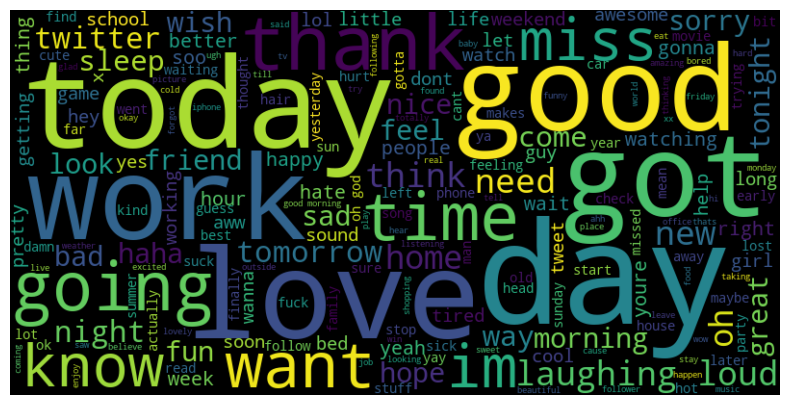

In [96]:
x = ' '.join(df['tweets_no_stop'].tolist())

cloud = WordCloud(width=800, height=400).generate(x)

plt.figure(dpi=100, figsize=(10,5))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

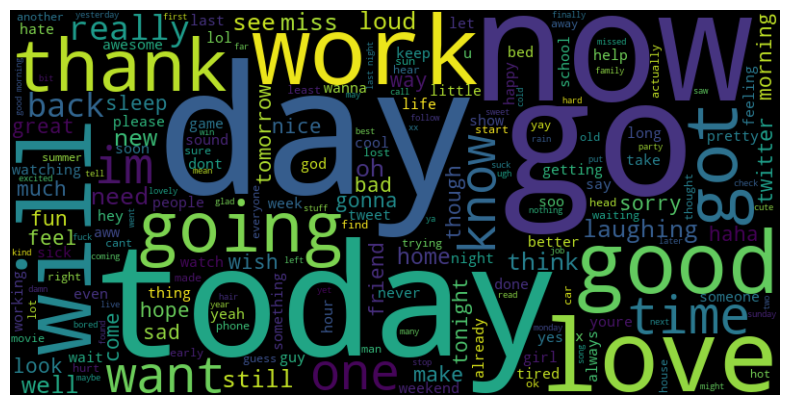

In [97]:
x = ' '.join(df['tweets'].tolist())

cloud = WordCloud(width=800, height=400).generate(x)

plt.figure(dpi=100, figsize=(10,5))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### 23. Spelling Correction 

In [101]:
#!pip install -U textblob==0.18.0.post0
#!python -m textblob.download_corpora

In [102]:
from textblob import Word

x = 'abbility'
w = Word(x)
w.spellcheck()

[('ability', 1.0)]

In [103]:
x = 'xake'
w = Word(x)
w.spellcheck()

[('take', 0.4797507788161994),
 ('make', 0.3925233644859813),
 ('sake', 0.07554517133956386),
 ('wake', 0.02102803738317757),
 ('lake', 0.02102803738317757),
 ('cake', 0.004672897196261682),
 ('rake', 0.003115264797507788),
 ('bake', 0.001557632398753894),
 ('jake', 0.000778816199376947)]

In [117]:
x = 'lovvee'
w = Word(x)
w.spellcheck()

[('love', 0.7289156626506024),
 ('loved', 0.1927710843373494),
 ('lover', 0.0391566265060241),
 ('loves', 0.03162650602409638),
 ('levee', 0.007530120481927711)]

In [118]:
x = 'lovvvvvvvveeeeeeeeee youuuuuuuuu' # love you

pattern = r'(.)\1+'

x = re.sub(pattern, r'\1\1', x)

print(x)

words = []
for word in x.split():
    w = Word(word)
    # print(w.correct())
    words.append(w.correct())

' '.join(words)

lovvee youu


'love you'

In [124]:
def correct(x):
    words = []
    for word in x.split():
        w = Word(word)
        # print(w.correct())
        words.append(w.correct())

    return ' '.join(words)

correct(x)

'love you'

In [120]:
data = df.sample(100, random_state=0)

In [122]:
data.head(5)

,tweets,sentiment,char_count,word_count,avg_word_length,stop_word_len,hashtags_count,mentions_count,numeric_count,upper_counts,emails,emails_count,urls,urls_count,is_retweet,tweets_no_stop,base_tweets,no_common_tweets,no_least_tweets
2230,i shall just let go of it do it once and for a...,1,98,29,3.4,19,0,0,0,0,,0,[],0,False,shall let think positive rest sun mon,i shall just let go of it do it once and for a...,i shall just let go of it do it once and for a...,i shall just let go of it do it once and for a...
668,hopefully tonight my foot does not hurt as muc...,0,100,22,4.5,11,0,0,1,0,,0,[],0,False,hopefully tonight foot hurt night 3 painkiller...,hopefully tonight my foot does not hurt as muc...,hopefully tonight my foot does not hurt as muc...,hopefully tonight my foot does not hurt as muc...
3616,holy shiatsu i got a freakin b in physics than...,1,56,12,4.7,3,0,0,0,5,,0,[],0,False,holy shiatsu got freakin b physics thank kerrigan,holy shiatsu i get a freakin b in physics than...,holy shiatsu i a freakin b in physics thank yo...,holy shiatsu i got a freakin b in physics than...
2363,cleaning done whole house is shining,1,31,6,5.2,3,0,0,0,0,,0,[],0,False,cleaning house shining,cleaning do whole house is shine,cleaning done whole house is shining,cleaning done whole house is shining
142,wants to go to the confirmation today but cant x,0,39,10,3.9,5,0,0,0,0,,0,[],0,False,wants confirmation today cant x,want to go to the confirmation today but ca nt x,wants to go to the confirmation but cant x,wants to go to the confirmation today but cant x


In [125]:
data['correct_tweets'] = data['tweets'].apply(correct)

In [126]:
data[data['tweets'] != data['correct_tweets']][['tweets', 'correct_tweets']].head()

,tweets,correct_tweets
3616,holy shiatsu i got a freakin b in physics than...,holy shirts i got a breaking b in physics than...
142,wants to go to the confirmation today but cant x,wants to go to the confirmation today but can x
538,i wish gossip girl was on,i wish gossip girl was on
1791,product of fundamentals class 300pm final exa...,product of fundamentals class 300pm final exam...
410,feel soo bad i got matty sick now i am at work...,feel so bad i got fatty sick now i am at work ...


### 24. Detecting Nouns Chunks and Phrases

In [127]:
from textblob import TextBlob

x= 'My goodness, what a delightful establishment with such wonderful individuals working there. The staff was exceptionally friendly and accommodating. I had intended to trade in my Apple MacBook Air M1 for the most recent M3 Air, but unfortunately, the store was quite crowded, and I was unable to do so. Despite this minor inconvenience, I must say that my overall experience was quite enjoyable.'

blob = TextBlob(x)
noun_phrase = blob.noun_phrases

noun_phrase

WordList(['delightful establishment', 'such wonderful individuals', 'apple macbook', 'm1', 'm3', 'minor inconvenience', 'overall experience'])

In [131]:
doc = nlp(x)

noun_chunks = [chunk.text for chunk in doc.noun_chunks]
noun_chunks

['My goodness',
 'what a delightful establishment',
 'such wonderful individuals',
 'The staff',
 'I',
 'my Apple MacBook Air M1',
 'the most recent M3 Air',
 'the store',
 'I',
 'this minor inconvenience',
 'I',
 'my overall experience']

In [137]:
data['noun_chunks'] = data['tweets'].apply(lambda x: TextBlob(x).noun_phrases)

In [138]:
data['noun_chunks'].value_counts()

noun_chunks
[]                              32
[rest sun]                       1
[shiatsu i, freakin b]           1
[whole house]                    1
[cant x]                         1
                                ..
[taco bell wrappers, seat i]     1
[wrap party]                     1
[ice cream, hot day]             1
[palm pre, bad im]               1
[great i hope, beautiful xx]     1
Name: count, Length: 69, dtype: int64

### 25. N-Gram, Word Counts, Singularize, Pluralize, Lemmatize and so much more

In [142]:
x = 'Cats and Dogs are playing together. Cats are running faster than dogs. The Ox is playing with men.'

In [143]:
blob = TextBlob(x)

In [148]:
['_'.join(word) for word in blob.ngrams(2)]
['_'.join(word) for word in blob.ngrams(3)]

['Cats_and_Dogs',
 'and_Dogs_are',
 'Dogs_are_playing',
 'are_playing_together',
 'playing_together_Cats',
 'together_Cats_are',
 'Cats_are_running',
 'are_running_faster',
 'running_faster_than',
 'faster_than_dogs',
 'than_dogs_The',
 'dogs_The_Ox',
 'The_Ox_is',
 'Ox_is_playing',
 'is_playing_with',
 'playing_with_men']

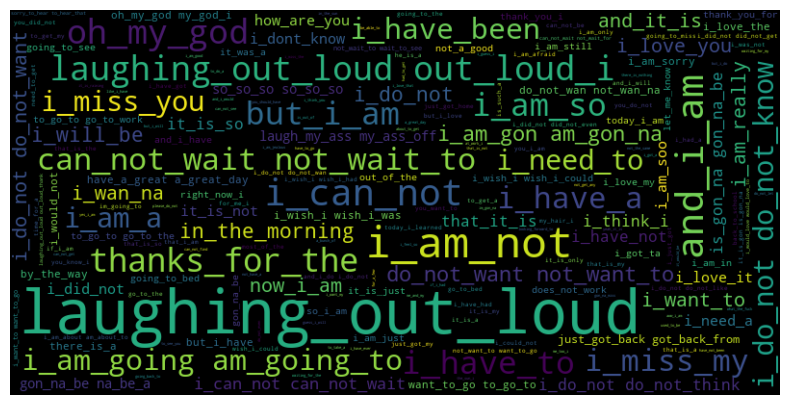

In [149]:
x = ' '.join(df['tweets'].tolist())
blob = TextBlob(x)
x = ' '.join(['_'.join(word) for word in blob.ngrams(3)])

cloud = WordCloud(width=800, height=400).generate(x)

plt.figure(dpi=100, figsize=(10,5))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [161]:
x = 'Cats and Dogs are playing together. Cats are running faster than dogs. The Ox is playing with men. cat'
x = x.lower()

blob = TextBlob(x)
x.count('do')

pattern = r'\bcat\b'
len(re.findall(pattern, x))


1

In [165]:
blob.words.count('dog')


0

In [166]:
blob.words

WordList(['cats', 'and', 'dogs', 'are', 'playing', 'together', 'cats', 'are', 'running', 'faster', 'than', 'dogs', 'the', 'ox', 'is', 'playing', 'with', 'men', 'cat'])

In [167]:
print([word.singularize() if tag in ['NNS'] else word for word, tag in blob.tags])

['cat', 'and', 'dog', 'are', 'playing', 'together', 'cat', 'are', 'running', 'faster', 'than', 'dog', 'the', 'ox', 'is', 'playing', 'with', 'man', 'cat']


In [175]:
print([word.pluralize() if tag in ['NN'] else word for word, tag in blob.tags])

['cats', 'and', 'dogs', 'are', 'playing', 'together', 'cats', 'are', 'running', 'faster', 'than', 'dogs', 'the', 'oxen', 'is', 'playing', 'with', 'men', 'cats']


In [176]:
print([word.lemmatize('v') for word in blob.words])

['cat', 'and', 'dog', 'be', 'play', 'together', 'cat', 'be', 'run', 'faster', 'than', 'dog', 'the', 'ox', 'be', 'play', 'with', 'men', 'cat']


### 26. Use TextBlob's Inbuilt Sentiment Classifier 

In [177]:
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer

x = 'we all stand together. we are gonna win this fight.'

blob = TextBlob(x, analyzer=NaiveBayesAnalyzer())
blob.sentiment

Sentiment(classification='pos', p_pos=0.8948284226465963, p_neg=0.10517157735340235)

In [178]:
x = 'i do not like this'

blob = TextBlob(x, analyzer=NaiveBayesAnalyzer())
blob.sentiment

Sentiment(classification='neg', p_pos=0.48478060149744384, p_neg=0.5152193985025563)

In [179]:
data = pd.read_csv('https://raw.githubusercontent.com/laxmimerit/All-CSV-ML-Data-Files-Download/master/moviereviews.tsv', sep='\t')

In [182]:
data = data.sample(20, random_state=0)

In [183]:
data['pred'] = data['review'].apply(lambda x: TextBlob(x, analyzer=NaiveBayesAnalyzer()).sentiment.classification)

In [184]:
data.head()

,label,review,pred
1544,pos,"ingredients : pouring rain , small flooded tow...",pos
1190,pos,the most amazing thing about paul cox's innoce...,pos
1205,pos,assume nothing . \r\nthe phrase is perhaps one...,pos
1857,pos,copyright 1996 graeme huggan carry on henry is...,pos
1266,pos,"as a revolutionary war hero in the patriot , m...",pos


### 27. Language Translation and Detection

Language Code: https://www.loc.gov/standards/iso639-2/php/code_list.php

In [186]:
# pip install googletrans==4.0.0rc1

In [187]:
from googletrans import Translator

In [190]:
x = 'we all stand together. we are gonna win this fight.'
x = 'همه با هم می ایستیم ما در این مبارزه پیروز خواهیم شد'

translator = Translator()

translator.detect(x).lang

'fa'

In [191]:
# x = 'we all stand together. we are gonna win this fight.'
x = 'همه با هم می ایستیم ما در این مبارزه پیروز خواهیم شد'
translator.translate(x, dest='en').text

'We all stand together. We will win in this struggle'

In [192]:
x = 'we all stand together. we are gonna win this fight.'
translator.translate(x, dest='hi').text

'हम सभी एक साथ खड़े हैं।हम इस लड़ाई को जीतने वाले हैं।'